## __Import__

Bayern - Wolfsburg: 3890305
Hoffenheim - Schalke: 3890561

In [48]:
from statsbombpy import sb
import pandas as pd
import numpy as np

COMPETITION_ID = 9
SEASON_ID = 27
MATCH_ID = 3890561 
events = sb.events(match_id=MATCH_ID)
events.columns, len(events.columns)

(Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
        'block_deflection', 'carry_end_location', 'clearance_aerial_won',
        'clearance_body_part', 'clearance_head', 'clearance_left_foot',
        'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
        'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
        'duration', 'foul_committed_advantage', 'foul_committed_card',
        'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part',
        'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
        'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
        'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
        'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
        'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
        'pass_end_location', 'pass_goal_assist', 'pass_height',
        'pass_inswinging', 'pass_length', 'pass_outcome', 'pas

In [49]:
events["type"].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Block', 'Ball Recovery', 'Miscontrol', 'Interception',
       'Foul Committed', 'Foul Won', 'Shot', 'Goal Keeper', 'Duel',
       'Dribble', 'Dribbled Past', 'Clearance', 'Dispossessed',
       'Tactical Shift', 'Injury Stoppage', 'Player Off', 'Player On',
       'Half End', 'Substitution', 'Shield', 'Own Goal Against',
       'Own Goal For'], dtype=object)

## __Relevant Columns__

In [50]:
columns = ["player", "position", "type", "location", "minute", "shot_aerial_won", "play_pattern", "shot_body_part", "shot_end_location" ,"shot_first_time","shot_outcome","shot_statsbomb_xg", "shot_technique", "shot_type", "under_pressure"]
#df_shooting = events[events["type"] == "Shot"]
#df = events.loc[events["type"] == "Shot", columns] # [row, column] selector
df = events.loc[events["type"] == "Shot"] # [row, column] selector

df

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
3692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Hoffenheim,175,00:04:21.052,Shot,NaN
3693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Schalke 04,181,00:06:27.395,Shot,NaN
3694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Hoffenheim,175,00:08:16.762,Shot,True
3695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Schalke 04,181,00:13:55.721,Shot,NaN
3696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Schalke 04,181,00:17:16.953,Shot,NaN
3697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Schalke 04,181,00:24:26.914,Shot,NaN
3698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Schalke 04,181,00:25:04.076,Shot,True
3699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Schalke 04,181,00:39:00.667,Shot,NaN
3700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Hoffenheim,175,00:40:06.160,Shot,NaN
3701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Hoffenheim,175,00:44:33.291,Shot,NaN


## __Visualize all Shot Attempts__

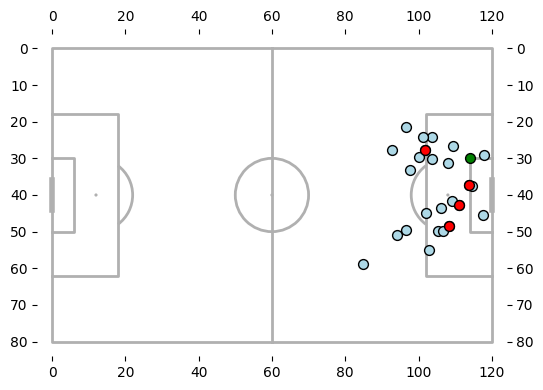

In [127]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import numpy as np

all_shots = np.vstack(df["location"])
goals = np.vstack(df[df['shot_outcome'] == 'Goal']['location'])



pitch = Pitch(label=True, tick=True)
#pitch = Pitch(pitch_type="custom", pitch_length=105,pitch_width=68 ,label=True, tick=True)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(all_shots[:, 0], all_shots[:, 1], c='lightblue', s=50, edgecolors='black', zorder=5)
ax.scatter(goals[:, 0], goals[:, 1], c='red', s=50, edgecolors='black', zorder=5)
ax.scatter(120 - 6 , (40 - (10)), c='green', s=50, edgecolors='black', zorder=5)
plt.show()


In [112]:
df["shot_first_time"].unique()

array([True, nan], dtype=object)

## __Creation__

PITCH_WIDTH = 120

def is_in_penalty_area(location):
    x_axis = ((102 <= location[0]) and (location[0] <= 120))
    y_axis = ((40 - (22)) <= location[1] and location[1] <= (40 + (22)))
    return x_axis and y_axis

def is_in_goal_area(location):
    x_axis = ((120 - 6 <= location[0]) and (location[0] <= 120))
    y_axis = ((40 - (10)) <= location[1] and location[1] <= (40 + 10))
    return x_axis and y_axis

def is_in_attacking_third(location):
    PITCH_WIDTH = 120
    return  (2 * (PITCH_WIDTH/3)) <= location[0].




In [132]:
PITCH_WIDTH = 120

def is_in_goal_area(location):
    x_axis = ((120 - 6 <= location[0]) and (location[0] <= 120))
    y_axis = ((40 - 10) <= location[1] and location[1] <= (40 + 10))
    return x_axis and y_axis

def is_in_penalty_area(location):
    # Check if in larger penalty area but NOT in goal area
    x_axis = ((102 <= location[0]) and (location[0] < 114))  # Stop before goal area
    y_axis = ((40 - 22) <= location[1] and location[1] <= (40 + 22))
    return x_axis and y_axis

def is_in_attacking_third(location):
    # Check if in attacking third but NOT in penalty area
    PITCH_WIDTH = 120
    attacking_third_start = 2 * (PITCH_WIDTH/3)
    return (attacking_third_start <= location[0] < 102)  # Stop before penalty area

def is_in_middle_third(location):
    PITCH_WIDTH = 120
    return  (1 * (PITCH_WIDTH/3)) <= location[0] <= (2 * (PITCH_WIDTH/3))

# shots_in_2/3 = "test"

# Create player statistics
player_stats = df[df['type'] == 'Shot'].groupby('player').agg(
    goals=('shot_outcome', lambda x: (x == 'Goal').sum()),
    shot_total=('shot_outcome', "count"), # optionally: sum
    shots_on_target=('shot_outcome', lambda x: (x != 'Off T').sum()),
    shots_from_freekick = ('shot_type', lambda x: (x == "Free Kick").sum()),
    shots_from_penalty = ('shot_type', lambda x: (x == "Penalty").sum()), 
    shots_on_target_left_foot = ("shot_body_part", lambda x: (x == "Left Foot").sum()),
    shots_on_target_right_foot = ("shot_body_part", lambda x: (x == "Right Foot").sum()),
    goals_from_left_foot=('shot_body_part', lambda x: ((df['shot_outcome'] == 'Goal') & (x == 'Left Foot')).sum()),
    goals_from_right_foot=('shot_body_part', lambda x: ((df['shot_outcome'] == 'Goal') & (x == 'Right Foot')).sum()),
    goals_from_head=('shot_body_part', lambda x: ((df['shot_outcome'] == 'Goal') & (x == 'Head')).sum()),
    goals_after_first_touch=('shot_first_time', lambda x: ((df['shot_outcome'] == 'Goal') & (x == True)).sum()),
    shots_inside_penalty_area=("location", lambda x: x.apply(is_in_penalty_area).sum()),
    shots_inside_goal_area=("location", lambda x: x.apply(is_in_goal_area).sum()),
    shots_in_attacking_third=("location", lambda x: x.apply(is_in_attacking_third).sum()),
    shots_in_middle_third=("location", lambda x: x.apply(is_in_middle_third).sum())
    #shots_in_2/3.. 
)

player_stats

,goals,shot_total,shots_on_target,shots_from_freekick,shots_from_penalty,shots_on_target_left_foot,shots_on_target_right_foot,goals_from_left_foot,goals_from_right_foot,goals_from_head,goals_after_first_touch,shots_inside_penalty_area,shots_inside_goal_area,shots_in_attacking_third,shots_in_middle_third
player,,,,,,,,,,,,,,,
Andrej Kramarić,0,3,3,0,0,1,2,0,0,0,0,2,0,1,0
Eugen Polanski,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
Fabian Lukas Schär,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
Jean-Eric Maxim Choupo-Moting,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0
Joël Andre Job Matip,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
Kevin Kuranyi,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
Kevin Volland,0,2,2,0,0,2,0,0,0,0,0,1,0,0,0
Klaas-Jan Huntelaar,1,5,3,0,0,0,4,0,1,0,1,4,0,1,0
Leroy Sané,1,3,3,0,0,3,0,1,0,0,0,2,0,1,0


In [93]:
#df = events.loc[events["shot_outcome"].notna(), ["timestamp", "player", "location", "type", "shot_outcome"]]

df['x'] = df['location'].apply(lambda x: x[0])
df['y'] = df['location'].apply(lambda x: x[1])

# Define penalty area boundaries (approximate)
PENALTY_AREA_X = 102  # Assuming penalty area starts at x=102

# Create player statistics
player_stats = df[df['type'] == 'Shot'].groupby('player').agg(
    Goals=('shot_outcome', lambda x: (x == 'Goal').sum()),
    Blocked=('shot_outcome', lambda x: sum(x == 'Blocked')),
    Saved=('shot_outcome', lambda x: sum(x == 'Saved')),
    Off_Target=('shot_outcome', lambda x: sum(x == 'Off T')),
    Total_Shots=('shot_outcome', "count"), # optionally: sum
    Shots_from_Penalty_Area=('x', lambda x: sum(x >= PENALTY_AREA_X)) # not actual penalty area - currently its just vertically seperated
)

# Calculate shooting accuracy
player_stats['Shot Accuracy %'] = round(
    (player_stats['Goals'] + player_stats['Saved']) / 
    player_stats['Total_Shots'] * 100, 1
)

# Reset index to make player names a column
player_stats = player_stats.reset_index()

player_stats

,player,Goals,Blocked,Saved,Off_Target,Total_Shots,Shots_from_Penalty_Area,Shot Accuracy %
0,Andrej Kramarić,0,1,2,0,3,2,66.7
1,Eugen Polanski,0,0,1,0,1,0,100.0
2,Fabian Lukas Schär,0,0,0,1,1,0,0.0
3,Jean-Eric Maxim Choupo-Moting,1,0,0,0,1,0,100.0
4,Joël Andre Job Matip,0,0,0,1,1,1,0.0
5,Kevin Kuranyi,0,0,0,1,1,1,0.0
6,Kevin Volland,0,2,0,0,2,2,0.0
7,Klaas-Jan Huntelaar,1,0,2,2,5,4,60.0
8,Leroy Sané,1,0,2,0,3,2,100.0
9,Mark Uth,1,0,0,1,2,2,50.0


In [ ]:
df = events[["timestamp","player","location","type","shot_outcome", "under_pressure"]]
mask = events["shot_outcome"].notna()
df = events[mask]

df['x'] = df['location'].apply(lambda x: x[0])
df['y'] = df['location'].apply(lambda x: x[1])

# Clean up under_pressure column (convert empty strings to False)
df['under_pressure'] = df['under_pressure'].fillna(False)
df['under_pressure'] = df['under_pressure'].replace('', False)
# Define penalty area boundaries (approximate)
PENALTY_AREA_X = 102  # Assuming penalty area starts at x=102

# Create player statistics
def calculate_accuracy(shots):
    total = len(shots)
    if total == 0:
        return 0.0
    on_target = sum(shots.isin(['Goal', 'Saved']))
    return round((on_target / total) * 100, 1)

player_stats = df[df['type'] == 'Shot'].groupby('player').agg(
    Goals=('shot_outcome', lambda x: (x == 'Goal').sum()),
    Blocked=('shot_outcome', lambda x: sum(x == 'Blocked')),
    Saved=('shot_outcome', lambda x: sum(x == 'Saved')),
    Off_Target=('shot_outcome', lambda x: sum(x == 'Off T')),
    Total_Shots=('shot_outcome', "count"), # optionally: sum
    Shots_from_Penalty_Area=('x', lambda x: sum(x >= PENALTY_AREA_X)) # not actual penalty area - currently its just vertically seperated
)
player_stats = player_stats.reset_index()

# Calculate pressure-specific statistics
pressure_stats = df[df['type'] == 'Shot'].groupby(['player', 'under_pressure']).agg(
    Shots=('shot_outcome', 'count'),
    Accuracy=('shot_outcome', calculate_accuracy)
)

#print(pressure_stats)
# Extract pressure statistics
pressure_data = []
for player in pressure_stats.index.get_level_values(0).unique():
    player_data = {
        'player': player,
        'Shots Under Pressure': 0,
        'Accuracy Under Pressure %': 0.0
    }
    if (player, True) in pressure_stats.index:
        player_data['Shots Under Pressure'] = pressure_stats["Shots"].loc[(player, True)]
        player_data['Accuracy Under Pressure %'] = pressure_stats["Accuracy"].loc[(player, True)]

        
    pressure_data.append(player_data)

pressure_df = pd.DataFrame(pressure_data)
#display(pressure_df)


# Merge with pressure statistics
final_stats = player_stats.merge(pressure_df, on='player', how='left')
display(final_stats)


C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_15256\1009046511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = df['location'].apply(lambda x: x[0])
C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_15256\1009046511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['location'].apply(lambda x: x[1])
C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_15256\1009046511.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and 

,player,Goals,Blocked,Saved,Off_Target,Total_Shots,Shots_from_Penalty_Area,Shots Under Pressure,Accuracy Under Pressure %
0,Andrej Kramarić,0,1,2,0,3,2,3,66.7
1,Eugen Polanski,0,0,1,0,1,0,1,100.0
2,Fabian Lukas Schär,0,0,0,1,1,0,0,0.0
3,Jean-Eric Maxim Choupo-Moting,1,0,0,0,1,0,0,0.0
4,Joël Andre Job Matip,0,0,0,1,1,1,1,0.0
5,Kevin Kuranyi,0,0,0,1,1,1,1,0.0
6,Kevin Volland,0,2,0,0,2,2,1,0.0
7,Klaas-Jan Huntelaar,1,0,2,2,5,4,0,0.0
8,Leroy Sané,1,0,2,0,3,2,1,100.0
9,Mark Uth,1,0,0,1,2,2,1,0.0


'\n'

In [25]:
pressure_stats = df[df['type'] == 'Shot'].groupby(['player', 'under_pressure']).agg({
        'shot_outcome': [('shots', 'count'), ('accuracy', calculate_accuracy)]
    })
pressure_stats

shot_outcome         
                                                    shots accuracy
player                        under_pressure                      
Andrej Kramarić               True                      3     66.7
Eugen Polanski                True                      1    100.0
Fabian Lukas Schär            False                     1      0.0
Jean-Eric Maxim Choupo-Moting False                     1    100.0
Joël Andre Job Matip          True                      1      0.0
Kevin Kuranyi                 True                      1      0.0
Kevin Volland                 False                     1      0.0
                              True                      1      0.0
Klaas-Jan Huntelaar           False                     5     60.0
Leroy Sané                    False                     2    100.0
                              True                      1    100.0
Mark Uth                      False                     1    100.0
                              True                      1      0.0
Max Meyer                     True                      1      0.0
Sebastian Rudy                False                     1      0.0
                              True                      1      0.0
Tarik Elyounoussi             False                     1      0.0
Younès Belhanda               False                     1    100.0

In [13]:
events = events[["timestamp","player","location","type","shot_outcome"]]
mask = events["shot_outcome"].notna()
df = events[mask]

df['x'] = df['location'].apply(lambda x: x[0])
df['y'] = df['location'].apply(lambda x: x[1])


# Define penalty area boundaries (approximate)
PENALTY_AREA_X = 102  # Assuming penalty area starts at x=102

# Create player statistics
player_stats = df[df['type'] == 'Shot'].groupby('player').agg({
    'shot_outcome': [
        ('Goals', lambda x: sum(x == 'Goal')),
        ('Blocked', lambda x: sum(x == 'Blocked')),
        ('Saved', lambda x: sum(x == 'Saved')),
        ('Off Target', lambda x: sum(x == 'Off T')),
        ('Total Shots', 'count')
    ],
    'x': [
        ('Shots from Penalty Area', lambda x: sum(x >= PENALTY_AREA_X))
    ]
})
player_stats.columns = [f'{col[1]}' for col in player_stats.columns]
player_stats

C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_31280\1934061047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = df['location'].apply(lambda x: x[0])
C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_31280\1934061047.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['location'].apply(lambda x: x[1])


,Goals,Blocked,Saved,Off Target,Total Shots,Shots from Penalty Area
player,,,,,,
Andrej Kramarić,0,1,2,0,3,2
Eugen Polanski,0,0,1,0,1,0
Fabian Lukas Schär,0,0,0,1,1,0
Jean-Eric Maxim Choupo-Moting,1,0,0,0,1,0
Joël Andre Job Matip,0,0,0,1,1,1
Kevin Kuranyi,0,0,0,1,1,1
Kevin Volland,0,2,0,0,2,2
Klaas-Jan Huntelaar,1,0,2,2,5,4
Leroy Sané,1,0,2,0,3,2


In [ ]:
events[mask]

In [11]:
sb.events(match_id=3895302, split=True, flatten_attrs=False).keys()

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'miscontrols', 'dribbles', 'duels', 'interceptions', 'ball_recoverys', 'dispossesseds', 'blocks', 'foul_committeds', 'foul_wons', 'errors', 'shots', 'goal_keepers', 'injury_stoppages', 'referee_ball_drops', '50/50s', 'clearances', 'offsides', 'dribbled_pasts', 'player_offs', 'player_ons', 'half_ends', 'substitutions', 'bad_behaviours', 'tactical_shifts', 'shields'])

In [5]:
events[events["type"].notna()]

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",Hoffenheim,175,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",Schalke 04,181,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Hoffenheim,175,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Schalke 04,181,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Schalke 04,181,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Marco Höger,8824.0,NaN,Schalke 04,181,00:39:38.537,Substitution,NaN
3936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Alexander Nübel,20662.0,NaN,Schalke 04,181,00:44:14.348,Substitution,NaN
3937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Schalke 04,181,00:28:05.479,Shield,True
3938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Hoffenheim,175,00:43:17.228,Own Goal Against,NaN


In [8]:
events["type"].value_counts()

type
Pass                1096
Ball Receipt*       1063
Carry                932
Pressure             371
Ball Recovery         76
Duel                  58
Dribble               41
Block                 37
Goal Keeper           32
Foul Committed        30
Foul Won              30
Interception          26
Shot                  25
Miscontrol            25
Dispossessed          24
Clearance             23
Dribbled Past         22
Substitution           6
Half End               4
Half Start             4
Tactical Shift         4
Injury Stoppage        4
Starting XI            2
Player On              1
Player Off             1
Shield                 1
Own Goal Against       1
Own Goal For           1
Name: count, dtype: int64